## Data loading

In [47]:
#Reading csv file from device and converting it to dataframe
import pandas as pd #importing pandas library
df = pd.read_csv(r"C:\Users\LaptopCheckout\OneDrive - UNT System\Documents\data.csv") #Showing path of the file located.

In [48]:
# Here we are showing the information of the above dataframe.
df.info() #This instruction shows all the data regarding dataframe like null counts , datatypes etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        33801 non-null  int64  
 1   id                32110 non-null  object 
 2   brand             31180 non-null  object 
 3   categories        32110 non-null  object 
 4   name              32110 non-null  object 
 5   prices.amountMin  32110 non-null  float64
 6   prices.amountMax  32110 non-null  float64
 7   prices.currency   32110 non-null  object 
 8   prices.isSale     32110 non-null  object 
 9   prices.dateAdded  32110 non-null  object 
 10  features          25835 non-null  object 
 11  colors            32110 non-null  object 
 12  ratings           33801 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 3.4+ MB


In [49]:
#This line gives the average missing data over all columns (There are total 12 columns)
(df.isnull().mean().sum()*100)/12

6.362237803615279

# Data pre-processing

In [50]:
#value_counts gives count of different values of that column.
df['prices.currency'].value_counts()

USD    31050
CAD      954
EUR       94
AUD       11
GBP        1
Name: prices.currency, dtype: int64

In [51]:
df['brand'].value_counts()# value_counts gives count of rows for each different value in that column

Journee Collection    1330
Ralph Lauren           937
Propet                 759
Skechers               754
Nike                   617
                      ... 
BCBG Paris               1
COLUMBIA                 1
CTM                      1
Korks                    1
Amalfi by Rangoni        1
Name: brand, Length: 1348, dtype: int64

In [52]:
#changing all the prices into USD and removing prices.currency column
j = 0 # j is index of rows in prices.currency column
for i in df['prices.currency']:
    if i == 'CAD':
        df.loc[j,'prices.amountMax'] *= (0.80) #1 CAD = 0.80 USD
        df.loc[j,'prices.amountMin'] *= (0.80)
    elif i == 'EUR':
        df.loc[j,'prices.amountMax'] *= (1.08) #1 CAD = 1.08 USD
        df.loc[j,'prices.amountMin'] *= (1.08)
    elif i == 'AUD':
        df.loc[j,'prices.amountMax'] *= (0.73) #1 CAD = 0.73 USD
        df.loc[j,'prices.amountMin'] *= (0.73)
    elif i == 'GBP':
        df.loc[j,'prices.amountMax'] *= (1.29) #1 CAD = 1.29 USD
        df.loc[j,'prices.amountMin'] *= (1.29)
    j += 1


In [53]:
df = df.drop(['prices.currency'],axis = 1) #dropping prices.currency becuase we converted everything to USD

In [54]:
df['prices.average'] = df[['prices.amountMax','prices.amountMin']].mean(axis=1) # inserting new column prices.average which is mean of two columns 'prices.amountMax','prices.amountMin'

## Q1 What is the most popular women’s shoe brand?
Below graph shows the top 10 brands based on their number of sales. From the graph we can see that Journee Collection is the most popular women's shoe brand.

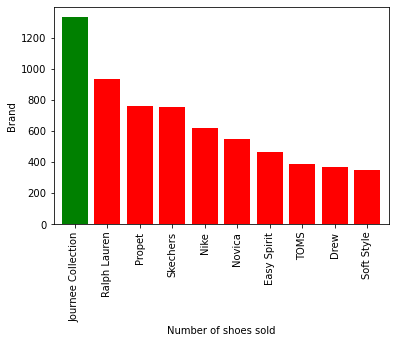

In [55]:
# plotting histogram number of sales for each brand using matplotlib
import matplotlib.pyplot as plt #importing pyplot library 
df['brand'].value_counts()[:10].plot(kind='bar',width=.8,color=['g','r','r','r','r','r','r','r','r','r']) # value_counts gives count of rows for each different value in that column , plot(kind=bar) plots bar graph
plt.xlabel("Number of shoes sold") # adding x label to plot
plt.ylabel("Brand") #adding y label to plot
plt.show() # printing plot 

## Q2 What is the most popular color in women’s shoes?
"Black" is the popular color among all women shoes.

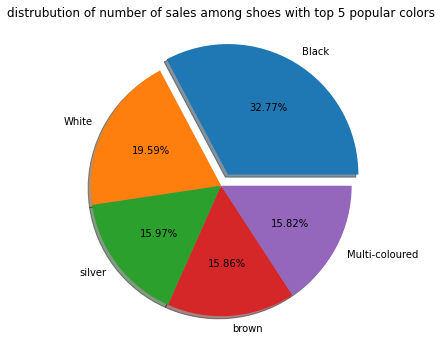

In [56]:
explode = (0.1,0,0,0,0) # This is used to seperate result from other pies
df['colors'].value_counts()[:5].plot.pie(figsize=(6,6),label = "",shadow = True,autopct='%1.2f%%',explode = explode) #plotting  using pie chart autopct='%1.2f%%' this is used to show percentages
plt.title('distrubution of number of sales among shoes with top 5 popular colors') # adding title to plot
plt.show() # printing plot

## Q3 What are the top 10 most expensive or luxurious brands in women’s shoes?
Brand are classified into expensive based on their average prices of all the shoes of a brand. From the below graph we can see that JewelsObesession is the most expensive women's shoe brand.

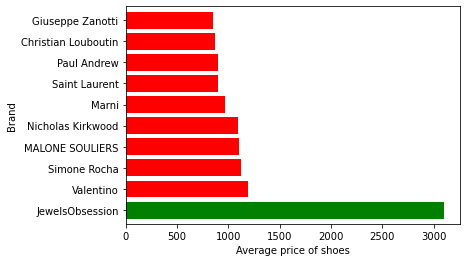

In [37]:
# finding expensive brands by finding average price of shoes of each brand
df.groupby(by='brand')['prices.average'].mean().sort_values(ascending = False)[:10].plot(kind='barh',width=.8,color=['g','r','r','r','r','r','r','r','r','r'])#finding mean of prices.average for each group(brand)
plt.xlabel("Average price of shoes") # adding x label to plot
plt.ylabel("Brand") # adding y label to plot
plt.show() # printing plot

## Q4 How prices are distrubuted in across brands? Do brands target particular customers? 
Here the below histograms were classified into two as popular brands and expensive brands, with respective to their prices.

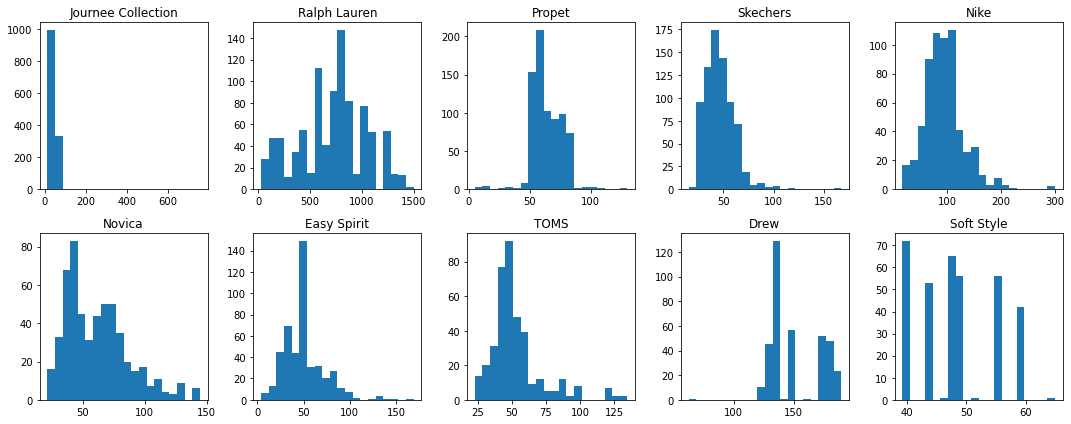

In [38]:
#Prices distributed across popular brands.
popular_brands = df['brand'].value_counts()[:10] #popular_brands stores the brands with most sales
fig, axs = plt.subplots(2, 5, figsize=(15, 6)) # fig is overall plot , axs[i,j] is each individual plot
i = 0 # row  number of subplot
j = 0 # column number of subplot
for brand,_ in popular_brands.iteritems(): # iterating through every row and finding price distrubution for every brand
    mask = df['brand'] == brand # df[mask] gives rows with 'brand' column = brand
    axs[j, i].hist(df[mask]['prices.average'], bins=20) # plots histogram of prices.average 
    axs[j, i].set_title( brand) # setting title to subplot
    i += 1 # increasing row number 
    if i>=5: # if row number exceeds 5 start from 0 (5 subplots per row)
        i = 0
        j = 1

plt.tight_layout()



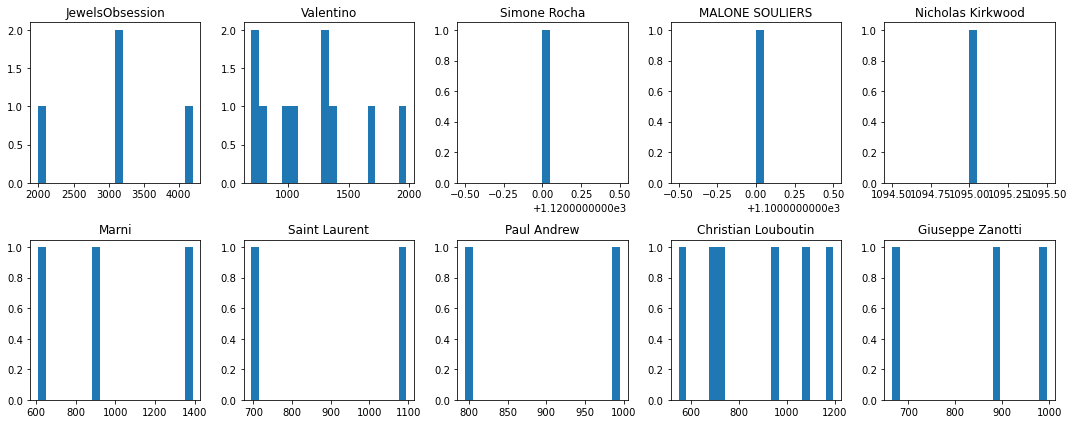

In [39]:
#Prices distributed across expensive brands.
expensive_brands = df.groupby(by='brand')['prices.average'].mean().sort_values(ascending = False)[:10] # expensive_brands stores list of top brands with highest average prices.
fig, axs = plt.subplots(2, 5, figsize=(15, 6))# fig is overall plot , axs[i,j] is each individual plot
i = 0# row  number of subplot
j = 0 # column number of subplot
for brand,_ in expensive_brands.iteritems(): # iterating through every row and finding price distrubution for every brand
    mask = df['brand'] == brand # df[mask] gives rows with 'brand' column = brand
    axs[j, i].hist(df[mask]['prices.average'], bins=20) # plots histogram of prices.average 
    axs[j, i].set_title( brand) # setting title to subplot
    i += 1 # increasing row number 
    if i>=5: # if row number exceeds 5 start from 0 (5 subplots per row)
        i = 0
        j = 1

plt.tight_layout()

# Q5 What are most frequently used colors by each brand?
Below table were listed the frequently used colors by each brand.

In [40]:
a = []  #a is list of model names
b = []  #b is list of brand names
import numpy as np
popular_brands = df['brand'].value_counts()[:10] 
for brand,_ in popular_brands.iteritems(): # iterating rows and finding best model of each brand
    mask = df['brand'] == brand
    x = df[mask]['colors'].value_counts()[:1].index.tolist()[0] # x is best sold model for a brand
    a.append(x) # appending x to list a
    b.append(brand) # appending brand to b
#tabulating using tabulate module
from tabulate import tabulate
data = np.array([b,a]) 
head = ["Brand", "Most used color"]
print(tabulate(data.T, headers=head, tablefmt="fancy_grid"))

╒════════════════════╤═══════════════════╕
│ Brand              │ Most used color   │
╞════════════════════╪═══════════════════╡
│ Journee Collection │ Black,Brown,Grey  │
├────────────────────┼───────────────────┤
│ Ralph Lauren       │ Black             │
├────────────────────┼───────────────────┤
│ Propet             │ White             │
├────────────────────┼───────────────────┤
│ Skechers           │ Multi-coloured    │
├────────────────────┼───────────────────┤
│ Nike               │ White             │
├────────────────────┼───────────────────┤
│ Novica             │ Blue              │
├────────────────────┼───────────────────┤
│ Easy Spirit        │ Black             │
├────────────────────┼───────────────────┤
│ TOMS               │ White             │
├────────────────────┼───────────────────┤
│ Drew               │ Multi-coloured    │
├────────────────────┼───────────────────┤
│ Soft Style         │ brown             │
╘════════════════════╧═══════════════════╛


## Q6 What is the best affordable shoe brand (Shoe brand that has high average rating and low average price)?
In the below plot "TOUCHSTONE" is the best affordable shoe brand.

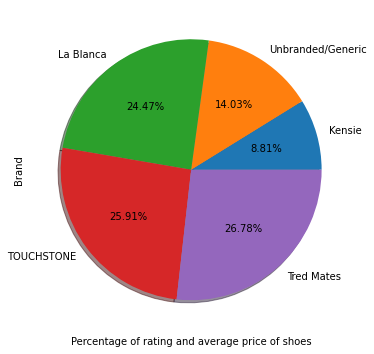

In [41]:
# finding affordable brands by finding average price and rating of shoes of each brand
df.groupby(by='brand')['ratings'].mean().sort_values(ascending = True)[:5],df.groupby(by='brand')['prices.average'].mean().sort_values(ascending = True)[:5].plot.pie(figsize=(6,6),label = "",shadow = True,autopct='%1.2f%%')# Grouping average rating and low average price and converting it into pie chart.
plt.xlabel("Percentage of rating and average price of shoes")# adding x axis label as percentages of average prices.
plt.ylabel("Brand")# Y label as brand.
plt.show()# printing pie chart.


## Q7 What are the top 5 highly rated women's shoe brands?
The Below mentioned graph shows the highly rated brand among women's shoe brands, Among them "Journee Collection" is the highly rated brand.

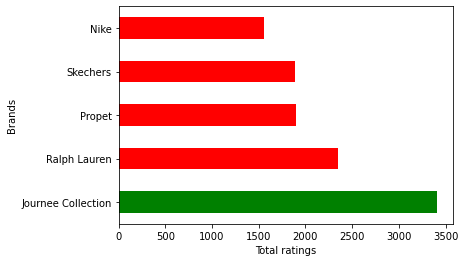

In [42]:
df.groupby(by='brand')['ratings'].sum().sort_values(ascending = False)[:5].plot(kind='barh',width=.5,color=['g','r','r','r','r',])#plotting sum of ratings of each brand
plt.xlabel("Total ratings") # adding x label
plt.ylabel("Brands") # adding y label
plt.show() # priting plot

## Q8 Most sold model for top 10 popular brands?
From first question we got most popular brand. Using that we can find the name of most sold model of that brand. From the table we can see that "Journee Collection Women's 'Shelley-3' Slouch Mid-Calf Microsuede Boot by Journee Collection" is the most sold model of the most popular brand.

In [43]:
a = [] #list of model names
b = [] #list of counts 
c = [] #list of brands
popular_brands = df['brand'].value_counts()[:10] #popular_brands is top 10 brands with most number of sales
for brand,_ in popular_brands.iteritems(): #iterating rows to find most sold model for every brand
    mask = df['brand'] == brand # masking
    x = df[mask]['name'].value_counts()[:1].index.tolist() #most sold model for a brand
    y = df[mask]['name'].value_counts()[:1] # count of sales for that model
    a.append(x[0]) #appending model name
    b.append(y[0]) # appending count of that model
    c.append(brand) #appending brand

#tabulating
from tabulate import tabulate
mydata = np.array([c,a])
mydata = mydata.T
head = ["Brand", "Model"]
print(tabulate(mydata, headers=head, tablefmt="fancy_grid"))

╒════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════╕
│ Brand              │ Model                                                                                        │
╞════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════╡
│ Journee Collection │ Journee Collection Women's 'Shelley-3' Slouch Mid-Calf Microsuede Boot by Journee Collection │
├────────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────┤
│ Ralph Lauren       │ Vachetta Sabeen Riding Boot                                                                  │
├────────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────┤
│ Propet             │ Women's Propet Tour Walker™ Hook & Loop Sport White by Propet                                │
├────────────────────┼──────────────────────────────────

## Q9 What are the colors used for most expensive women’s shoes?
In the below table we can see the most used colors in each popular Brand.

In [44]:
a = [] #list of colors
b = [] #list of brands
expensive_brands = df.groupby(by='brand')['prices.average'].mean().sort_values(ascending = False)[:10] #expensive brands by finding mean of prices.average and soritng it
for brand,_ in expensive_brands.iteritems(): #iterating expensive brands and finding most used color for every brand
    mask = df['brand'] == brand # masking
    x = df[mask]['colors'].value_counts()[:1].index.tolist()[0] #finding most used color using value_counts[:1]
    a.append(x) #appending color to a
    b.append(brand) # appening brand to b

#tabulating the result
data = np.array([b,a])
head = ["Brand", "Most used color"]
print(tabulate(data.T, headers=head, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════════╕
│ Brand               │ Most used color   │
╞═════════════════════╪═══════════════════╡
│ JewelsObsession     │ silver            │
├─────────────────────┼───────────────────┤
│ Valentino           │ White             │
├─────────────────────┼───────────────────┤
│ Simone Rocha        │ Multi-coloured    │
├─────────────────────┼───────────────────┤
│ MALONE SOULIERS     │ Multi-coloured    │
├─────────────────────┼───────────────────┤
│ Nicholas Kirkwood   │ black             │
├─────────────────────┼───────────────────┤
│ Marni               │ black             │
├─────────────────────┼───────────────────┤
│ Saint Laurent       │ silver            │
├─────────────────────┼───────────────────┤
│ Paul Andrew         │ brown             │
├─────────────────────┼───────────────────┤
│ Christian Louboutin │ black             │
├─────────────────────┼───────────────────┤
│ Giuseppe Zanotti    │ silver            │
╘═════════════════════╧═════════

## Q10 What is the most popular category in women’s shoes?
Below plot shows the most popular category in women's shoes, among them "Clothing,Shoes,Women's shoes All Women's Shoes" are the popular category among shoes.

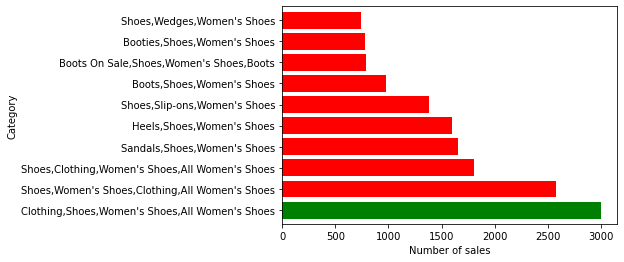

In [45]:
df['categories'].value_counts()[:10].plot(kind = 'barh',width=.8,color=['g','r','r','r','r','r','r','r','r','r']) #top 10 categories from value_counts and plotting barh
plt.xlabel("Number of sales") # adding x label 
plt.ylabel("Category") # adding y label
plt.show() # printing plot

## Here we have added one more additional research question
## Brands which has most number of shoes available for sale?
"Easy Spirit" Has more shoes available for sales.

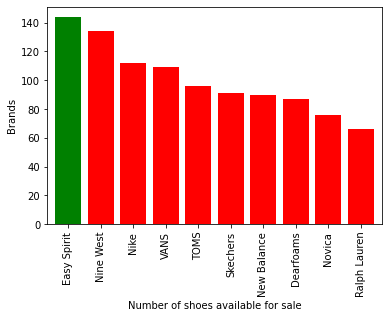

In [46]:
df.groupby(by='brand')['prices.isSale'].sum().sort_values(ascending = False)[:10].plot(kind='bar',width=.8,color=['g','r','r','r','r','r','r','r','r','r']) # for each group of brand finds the sum of isSale column values
plt.xlabel("Number of shoes available for sale") # adding x-axis label
plt.ylabel("Brands")# adding y-axis label
plt.show()# printing plot.

# Project Report

About Dataset

Our dataset contains list of 10,000 women's shoes and the prices at which they are sold. Each row contains details about shoes such as brand, color. This dataset has 33,801 rows and 12 columns. The data we have taken has 6.4 percent of missing data with almost same missing data percentage in every column. Below are the list of columns in our dataset.

   Columns:
*	Id – This column has unique id of women’s shoe.
*	Brand – This column has brands of shoes such as ‘Ralph lauren’, ‘Nike’ etc…
*	Categories – This column has category of shoe such as Heels, Boots etc..
*	Name – This column has name of model of shoes.
*	Prices.amountMin – This column stores minimum price of a shoe at which it can be sold.
*	 Prices.amountMax  – This column stores maximum price of a shoe at which it can be sold.
*	Prices.currency  – This column stores in currencies in which above two columns prices are denoted.
*	Prices.isSale  – This column stores categorical data of whether a shoe is on sale or not.
*	Prices.dateAdded  – This column stores date at which a shoe is added.
*	Features – This column stores features of shoe such as heel height ,  material used.
*	Colors – This column stores color of shoe.
*	Ratings -  This column stores the ratings given to shoe by customers.



Data pre-processing

* Our dataset is almost clean but some of the columns has more than 90 percent missing data.So, we dropped those columns. 
* We have also dropped columns which are not useful for our investigation.

*	prices.Currencies column has different types of currencies. When we have to compare prices of shoes all the prices have to be in same currency. So, we have to change every price column into USD. 
1 CAD = 0.80 USD 
1 EUR = 1.08 USD
1 AUD = 0.73 USD
1 GBP =  1.29 USD

    Using these relations we have changed every price column into USD.
*	In our dataset , A shoe price has a maximum and minimum price. To get better results we replaced shoe price with average of maximum and minimum price.
*	With this our dataset is clean and ready to investigate.


Method of investigation.

* We made analysis mainly on brand, color , price and ratings of shoes.
* We deeply analysed popular brands and expensive brands like what colors they use and how prices are distrubuted.
* We finally analysed ratings of brands and models of brands.
* We used numpy,pandas,matplotlib to analyse our data.
* We used bar graphs, pie charts, histograms and tabulate functions for showing results.

Research Questions and Answers.

1. What is the most popular women’s shoe brand?

* Journee Collection is the most popular women's shoe brand.

2. What is the most popular color in women’s shoes?

* Black is the popular color among all women shoes.

3. What are the top 10 most expensive or luxurious brands in women’s shoes?

* JewelsObesession is the most expensive women's shoe brand.

4. How prices are distrubuted in across brands? Do brands target particular customers?

* In the abovecells of Q4 there are two histograms posted against prices distribution between popular brands and expensive brands, yes prices distribution changes from popular brands to expensive brands and popular brands targets moderate customers and expensive brands targets Financially sound customers.

5. What are most frequently used colors by each brand?

* Below table were listed the frequently used colors by each brand.

            ╒════════════════════╤═══════════════════╕
            │ Brand              │ Most used color   │
            ╞════════════════════╪═══════════════════╡
            │ Journee Collection │ Black,Brown,Grey  │
            ├────────────────────┼───────────────────┤
            │ Ralph Lauren       │ Black             │
            ├────────────────────┼───────────────────┤
            │ Propet             │ White             │
            ├────────────────────┼───────────────────┤
            │ Skechers           │ Multi-coloured    │
            ├────────────────────┼───────────────────┤
            │ Nike               │ White             │
            ├────────────────────┼───────────────────┤
            │ Novica             │ Blue              │
            ├────────────────────┼───────────────────┤
            │ Easy Spirit        │ Black             │
            ├────────────────────┼───────────────────┤
            │ TOMS               │ White             │
            ├────────────────────┼───────────────────┤
            │ Drew               │ Multi-coloured    │
            ├────────────────────┼───────────────────┤
            │ Soft Style         │ brown             │
            ╘════════════════════╧═══════════════════╛
            
6. What is the best affordable shoe brand (Shoe brand that has high average rating and low average price)?

*  "TOUCHSTONE" is the best affordable shoe brand.

7.  What are the top 5 highly rated women's shoe brands?

* "Journee Collection" is the highly rated brand.

8. Most sold model for top 10 popular brands?

* From first question we got most popular brand. Using that we can find the name of most sold model of that brand. From the table we can see that "Journee Collection Women's 'Shelley-3' Slouch Mid-Calf Microsuede Boot by Journee Collection" is the most sold model of the most popular brand
        
9. What are the colors used for most expensive women’s shoes?

* In the below table we can see the most used colors in each popular Brand.
            ╒═════════════════════╤═══════════════════╕
            │ Brand               │ Most used color   │
            ╞═════════════════════╪═══════════════════╡
            │ JewelsObsession     │ silver            │
            ├─────────────────────┼───────────────────┤
            │ Valentino           │ White             │
            ├─────────────────────┼───────────────────┤
            │ Simone Rocha        │ Multi-coloured    │
            ├─────────────────────┼───────────────────┤
            │ MALONE SOULIERS     │ Multi-coloured    │
            ├─────────────────────┼───────────────────┤
            │ Nicholas Kirkwood   │ black             │
            ├─────────────────────┼───────────────────┤
            │ Marni               │ black             │
            ├─────────────────────┼───────────────────┤
            │ Saint Laurent       │ silver            │
            ├─────────────────────┼───────────────────┤
            │ Paul Andrew         │ brown             │
            ├─────────────────────┼───────────────────┤
            │ Christian Louboutin │ black             │
            ├─────────────────────┼───────────────────┤
            │ Giuseppe Zanotti    │ silver            │
            ╘═════════════════════╧═══════════════════╛

10. What is the most popular category in women’s shoes?

*  Plot shows the most popular category in women's shoes, among them "Clothing,Shoes,Women's shoes All Women's Shoes" are the popular category among shoes.

11. Brands which has most number of shoes available for sale?
* "Easy Spirit" Has more shoes available for sales.